**Data Sources and Preparation**

The primary source of financial data was Yahoo Finance, due to its accessibility and breadth. However, because of timeline constraints (limited historical depth), I supplemented this data with Financial Modeling Prep (FMP) API, which allowed me to enrich the dataset with critical variables such as:

- Sales-to-Capital ratio, and
- Revenue Growth (t).

This ensured a more complete training dataset with the depth needed for reliable forecasts.

I curated a batch of approximately 100 companies focused on the IT and AI sectors, including firms from software, SaaS, cloud computing, and enterprise AI — sectors comparable to Adobe, which is the subject of my valuation.

**Modeling Approach**

- Inputs (X):
  - Year-t financial variables such as: Revenue, EBIT, EBIT margin, CAPEX, ROIC, levarage ration, etc.
- Target (y):
  - Revenue growth in year t+1, i.e., rev_growth_t+1

**Rationale for Choosing This Target Variable**

I initially considered forecasting the long-term terminal growth rate. However, due to quality and availability limitations for long-term projections, I refocused on next-year revenue growth, which:

- Directly drives a DCF model — as revenue forecasts are the foundation of future cash flows.
- Aligns well with short-term forecasting horizons, making it more data-driven and empirically feasible;
- Requires only 3–5 years of historical data, which is more commonly available across firms and platforms.

**Integration with DCF Model**

The predicted rev_growth_t+1 is used to:
- Forecast revenue for year t+1;
- Estimate NOPAT and Free Cash Flow (FCF);
- Compute NOPAT and FCF.
- Serve as a base for Monte Carlo simulation input using a lognormal distribution

This pipeline allows me to connect machine learning–based prediction directly with a Monte Carlo-enhanced multi-phase DCF valuation — making the entire process data-driven, explainable, and academically sound.

For cretaing the data i chose the  companies from the following sectors:

Why these sectors are relevant to Adobe growth modeling?

1. **Enterprise SaaS (Core AI-native software firms) (Label: Enterprise SaaS)**
   
   These companies are central to the valuation problem. They deliver software platforms with subscription-based models serving large enterprise customers, and are often at the forefront of integrating AI into their core offerings. These firms share Adobe’s business model: recurring subscription revenues, high gross margins, and AI‑enriched productivity/enterprise workflows. Their growth dynamics mirror Adobe’s historical and forward‑looking profile.

Tickers: ADBE, MSFT, CRM, NOW, INTU, ADSK, WDAY, HUBS, PAYC, APPN, TTD, DOCU, TWLO, TEAM, ASAN, BOX

2. **Cloud Infrastructure / AI Analytics / Cybersecurity (Label: Cloud & Data)**
   
  Firms in this group provide the underlying AI/analytics infrastructure (e.g., cloud-native databases, cybersecurity, observability). Their performance and growth metrics offer useful macro signals for SaaS growth and spending. While slightly more volatile, they face similar sales cycles and pricing structures. Their cost and revenue scaling are relevant for DCF modeling.

Tickers: DDOG, SNOW, MDB, ZS, CRWD, PANW, NET, OKTA, ESTC, DOCN, CFLT, DT, CYBR, TENB, FTNT, QLYS, NTNX, CHKP, RPD, FSLY, AKAM, IOT, VRNS

3. **Platforms with AI integrations (developer tools, productivity, AIOps) (Label: AI DevOps)**

   These are platforms with AI-native integrations targeting engineering productivity, automation, and observability. PLTR, AI, FROG, and GTLB represent AI‑first developer or analytics tools. They show how AI can drive user expansion and monetization in niche but fast‑growing segments—relevant to Adobe’s AI product rollouts.

Tickers: MSTR, PLTR, AI, FROG, S, PD, GTLB, PATH, U, PEGA

4. **Communication & collaboration / CX SaaS (label: Collab & CX SaaS)**

   These companies focus on communication, collaboration, customer engagement, and experience management—often a secondary but highly correlated SaaS category.

Tickers: ZM, RNG, VRNT, CXM, FIVN, EGHT, NICE, DBX, APP

5. **Vertical SaaS / automation / niche workflow (Label: Vertical SaaS)**

   This category includes companies building domain-specific SaaS solutions (e.g., for construction, healthcare, finance, or logistics). These provide strong complementary data for Adobe’s niche use-case platforms.

Tickers: BL, BILL, BRZE, RAMP, AMPL, PCOR, MNDY, DOCS, APPF, JAMF, MANH, GWRE, TYL, SPSC, INTA, CCCS, DSGX

6. **Mature software firms with AI pivots (Label: Mature Pivots)**

   	These firms have long histories in enterprise software and are now pivoting toward AI-based models. They serve as valuable comparative baselines for AI adoption impact and help model potential deceleration in Adobe’s long‑term DCF (when AI‑driven hypergrowth normalizes).

Tickers: SAP, ORCL, ACN, FICO

7. **Consumer SaaS‑like platforms with strong AI integration (Label: Consumer SaaS)**

   Although consumer-focused, these platforms are increasingly adopting AI to personalize user experience. Their growth trajectories provide contrast and breadth for modeling. SHOP and DUOL apply AI to drive user engagement and monetization. While less enterprise‑focused, their AI‑driven growth mechanics resemble Adobe’s Creative Cloud.

Tickers: SHOP, DUOL, UBER, GEN, WIX, ZETA
   
8. **Anchor / big tech with enterprise SaaS & AI (Label: Mega‑Cap Tech)**

   AAPL, GOOG, and META serve as macro signals and long-term trend anchors for enterprise AI adoption (provide anchor benchmarks). MSFT is directly comparable to Adobe in enterprise AI SaaS; the others offer AI‑strategy signaling and boundary cases for your ML model.

Tickers: AAPL, GOOG, META, AMZN, NVDA

9. **AI‑driven chip‑design / EDA SaaS (Label: AI EDA)**

   AI-driven EDA (Electronic Design Automation) companies — such as Cadence (CDNS), Synopsys (SNPS), and Ansys (ANSS) — were initially considered as part of the broader AI software landscape. However, they were ultimately excluded from the machine learning pipeline for the following reasons:
   - Different Business Model Economics;
     - EDA platforms are often licensed via long, high-ticket contracts with semiconductor and industrial customers;
     - This differs from the usage-based, recurring revenue SaaS model that dominates the enterprise software space.
   - Customer Base;
     - Chipmakers, engineers, and hardware design teams — not general enterprise software buyers
   - Capital Intensity and Margin Profile;
     - EDA firms have higher R&D burdens and hardware integration costs;
     - SaaS firms are typically leaner, with highly scalable unit economics and low marginal costs.
   - Low Sample Size;
   - Different Growth Drivers:
     - AI EDA growth is driven by chip complexity, IP licensing, and foundry demand;
     - SaaS growth is driven by user expansion, upsell/cross-sell, and AI-enabled workflow automation.

Tickers: CDNS, SNPSour ML model.DA

In [1]:
import os
import pandas as pd
import numpy as np
from typing import List
import requests
import warnings

In [2]:
# new, expended tickers to get more observations keeping only highly relevant companies for my future prediction

tickers = [
    # Core Enterprise SaaS / AI‑native software (Label: Enterprise SaaS)
    # try adding "WK", 
    "ADBE", "MSFT", "CRM", "NOW", "INTU", "ADSK", "WDAY", "HUBS", "PAYC",
    "APPN", "TTD", "DOCU", "TWLO", "TEAM", "ASAN", "BOX", "WK",

    # Cloud infra / AI analytics / security (Label: Cloud & Data)
    "DDOG", "SNOW", "MDB", "ZS", "CRWD", "PANW", "NET", "OKTA", "ESTC",
    "DOCN", "CFLT", "DT", "CYBR", "TENB", "FTNT", "QLYS", "NTNX", "CHKP", "RPD",
    "FSLY", "AKAM", "IOT", "VRNS",

    # Platforms with AI integrations (developer tools, productivity, AIOps) (Label: AI‑DevOps)
    # try adding "HCP",
    "MSTR", "PLTR", "AI", "FROG", "S", "PD", "GTLB", "PATH", "U", "PEGA", 

    # Communication & collaboration / CX SaaS (label: Collab & CX SaaS)
    # try add "YEXT", "SMAR",
    "ZM", "RNG", "VRNT", "CXM", "FIVN", "EGHT", "NICE", "DBX", "APP", "YEXT", "SMAR",

    # Vertical SaaS / automation / niche workflow (Label: Vertical SaaS)
    # try add "VEEV", "TOST", "ALTR"
    "BL", "BILL", "BRZE", "RAMP", "AMPL", "PCOR", "MNDY", "DOCS", "APPF", "JAMF",
    "MANH", "GWRE", "TYL", "SPSC", "INTA", "CCCS", "DSGX", "ALTR", # "VEEV", "TOST",

    # Mature software firms with AI pivots (Label: Mature Pivots)
    # try adding "IBM", "CSCO", "HPE", "DELL", 
    "SAP", "ORCL", "ACN", "FICO", 

    # Consumer SaaS‑like platforms with strong AI integration (Label: Consumer SaaS)
    # try adding "SPOT", "NFLX", "MTCH",
    "SHOP", "DUOL", "UBER", "GEN", "WIX", "ZETA", 

    # AI‑driven chip‑design / EDA SaaS (Label: AI EDA) - not used in further analysis
    # try adding "ANSS", "KEYS", "ALTR",
    # "CDNS", "SNPS", "ANSS", "KEYS", "ALTR", 

    # Anchor / big tech with enterprise SaaS & AI (Label: Mega‑Cap Tech)
    "AAPL", "GOOG", "META", "AMZN", "NVDA",
]

In [3]:
len(tickers)

94

In [4]:
# FMP API

"""
Financial Feature Engineering with FMP API

This module downloads financial statements from the Financial Modeling Prep (FMP) API
and constructs a feature-rich DataFrame for each company. It is optimized for use in
machine learning models and DCF-based valuation.

"""

import os
import pandas as pd
import numpy as np
from typing import List
import requests
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

FMP_API_KEY = ""


def fetch_fmp_data(ticker: str, statement: str, limit: int = 8) -> pd.DataFrame:
    """
    Fetches financial statement data from the Financial Modeling Prep (FMP) API.

    Parameters:
    ----------
    ticker : str
        Stock ticker symbol (e.g., 'AAPL').
    statement : str
        Type of financial statement to fetch: 'income-statement', 'balance-sheet-statement', or 'cash-flow-statement'.
    limit : int
        Number of periods (e.g., annual statements) to retrieve.

    Returns:
    -------
    pd.DataFrame
        Financial statement data sorted chronologically by fiscal period.
    """
    url = f"https://financialmodelingprep.com/api/v3/{statement}/{ticker}?limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        # Converts the 'date' column to a proper datetime64 type (important for time series analysis)
        # This handles string-formatted dates like "2023-08-01" and converts them into actual date objects
        df.set_index('date', inplace=True)
        # Sort the DataFrame by the date index in ascending order
        # Ensures that time series data is ordered chronologically (which is required for many analyses).
        df.sort_index(inplace=True)
    return df

def download_and_prepare_financial_features(
    tickers: List[str],
    output_dir: str = "company_data",
    tax_rate: float = 0.21,
    save_csv: bool = True
) -> pd.DataFrame:
    """
    Downloads and engineers financial statement features for selected companies using FMP API.

    This function constructs a cleaned, feature-rich panel dataset with economic and accounting ratios,
    suitable for DCF valuation or machine learning. It includes target variable RevenueGrowth_t+1.

    Parameters:
    ----------
    tickers : List[str]
        List of stock ticker symbols (e.g., ['AAPL', 'MSFT']).
    output_dir : str
        Directory to save individual CSV files (one per company).
    tax_rate : float
        Effective corporate tax rate used in NOPAT and ROIC calculations.
    save_csv : bool
        Whether to save engineered features as individual CSVs.

    Returns:
    -------
    pd.DataFrame
        Combined feature DataFrame with one row per fiscal year per company.
    """
    os.makedirs(output_dir, exist_ok=True)
    all_data = []

    for ticker_symbol in tickers:
        print(f"Processing {ticker_symbol}...")
        try:
            # === Download raw data ===
            income_statement = fetch_fmp_data(ticker_symbol, "income-statement")
            balance_sheet = fetch_fmp_data(ticker_symbol, "balance-sheet-statement")
            cash_flow = fetch_fmp_data(ticker_symbol, "cash-flow-statement")

            # === Feature Engineering from Income Statement ===
            df_features = pd.DataFrame(index=income_statement.index)
            df_features["Revenue"] = income_statement.get("revenue", np.nan)
            df_features["NetIncome"] = income_statement.get("netIncome", np.nan)
            df_features["R&D"] = income_statement.get("researchAndDevelopmentExpenses", np.nan)
            df_features["SG&A"] = income_statement.get("sellingGeneralAndAdministrativeExpenses", np.nan)

            # EBIT fallback logic: prefer 'operatingIncome'; fallback to 'EBITDA - D&A'
            df_features["EBIT"] = income_statement.get("operatingIncome", np.nan)
            if df_features["EBIT"].isnull().all():
                ebitda = income_statement.get("ebitda")
                da = income_statement.get("depreciationAndAmortization")
                if ebitda is not None and da is not None:
                    df_features["EBIT"] = ebitda - da

            # Income statement ratios
            df_features["RevenueGrowth"] = df_features["Revenue"].pct_change()
            df_features["EBITMargin"] = df_features["EBIT"] / df_features["Revenue"]
            df_features["NetMargin"] = df_features["NetIncome"] / df_features["Revenue"]
            df_features["RD_to_Revenue"] = df_features["R&D"] / df_features["Revenue"]
            df_features["SGA_to_Revenue"] = df_features["SG&A"] / df_features["Revenue"]

            # === Cash Flow Features ===
            df_cash = pd.DataFrame(index=cash_flow.index)
            df_cash["OperatingCashFlow"] = cash_flow.get("operatingCashFlow", np.nan)
            df_cash["CapEx"] = cash_flow.get("capitalExpenditure", np.nan).abs()

            # === Balance Sheet Features ===
            df_bs = pd.DataFrame(index=balance_sheet.index)
            df_bs["Assets"] = balance_sheet.get("totalAssets", np.nan)
            df_bs["Equity"] = balance_sheet.get("totalStockholdersEquity", np.nan)
            df_bs["TotalDebt"] = balance_sheet.get("totalDebt", np.nan)
            df_bs["Cash"] = balance_sheet.get("cashAndCashEquivalents", np.nan)

            # Derived balance sheet metrics
            df_bs["Liabilities"] = df_bs["Assets"] - df_bs["Equity"]
            df_bs["NetDebt"] = df_bs["TotalDebt"] - df_bs["Cash"]
            df_bs["InvestedCapital"] = df_bs["Equity"] + df_bs["TotalDebt"] - df_bs["Cash"]

            # === Merge Financial Statements ===
            df = df_features.merge(df_cash, left_index=True, right_index=True, how="inner")
            df = df.merge(df_bs, left_index=True, right_index=True, how="inner")

            # === Final Derived Features ===
            df["FreeCashFlow"] = df["OperatingCashFlow"] - df["CapEx"]
            df["CapEx_to_Revenue"] = df["CapEx"] / df["Revenue"]
            df["ROA"] = df["NetIncome"] / df["Assets"]
            df["ROE"] = df["NetIncome"] / df["Equity"]
            df["Liabilities_to_Equity"] = df["Liabilities"] / df["Equity"]
            df["Debt_to_Equity"] = df["TotalDebt"] / df["Equity"]
            df["NOPAT"] = df["EBIT"] * (1 - tax_rate)  # Damodaran's unlevered after-tax operating income
            df["ROIC"] = df["NOPAT"] / df["InvestedCapital"]
            df["Sales_to_Capital"] = df["Revenue"].diff() / df["CapEx"].replace(0, np.nan)
            df["FCF_to_NetIncome"] = df["FreeCashFlow"] / df["NetIncome"]

            # === Machine Learning Target Variable ===
            df["RevenueGrowth_t+1"] = df["RevenueGrowth"].shift(-1)
            df["Ticker"] = ticker_symbol
            df.index.name = "Date"

            # === Data Cleaning ===
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            df.dropna(subset=["RevenueGrowth_t+1"], inplace=True)
            df.dropna(thresh=int(df.shape[1] * 0.8), inplace=True)
            df.columns = df.columns.str.replace(" ", "_").str.lower()

            # === Save CSV (optional) ===
            if save_csv:
                df.to_csv(os.path.join(output_dir, f"{ticker_symbol}_features.csv"))

            all_data.append(df)

        except Exception as e:
            print(f"Failed for {ticker_symbol}: {e}")
            continue

    # === Combine All Companies ===
    final_df = pd.concat(all_data)
    final_df.sort_index(inplace=True)
    return final_df

In [5]:
fetch_fmp_data("ADBE", "income-statement")

,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2017-12-01,ADBE,USD,0000796343,2018-01-22,2018-01-22 16:07:26,2017,FY,7301505000,1010491000,6291014000,...,0.292767,443687000,1693954000,0.232001,3.43,3.38,493632000,501123000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2018-11-30,ADBE,USD,0000796343,2019-01-25,2019-01-25 06:24:29,2018,FY,9030008000,1194999000,7835009000,...,0.309399,203102000,2590774000,0.286907,5.28,5.20,490564000,497843000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2019-11-29,ADBE,USD,0000796343,2020-01-21,2020-01-21 06:06:41,2019,FY,11171297000,1672720000,9498577000,...,0.286873,253283000,2951458000,0.264200,6.07,6.00,486291000,491572000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2020-11-27,ADBE,USD,0000796343,2021-01-15,2021-01-15 16:03:42,2020,FY,12868000000,1722000000,11146000000,...,0.324526,-1084000000,5260000000,0.408766,10.94,10.83,481000000,485000000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2021-12-03,ADBE,USD,0000796343,2022-01-21,2022-01-21 16:03:34,2021,FY,15785000000,1865000000,13920000000,...,0.361419,883000000,4822000000,0.305480,10.10,10.02,477000000,481000000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2022-12-02,ADBE,USD,0000796343,2023-01-17,2023-01-17 16:34:00,2022,FY,17606000000,2165000000,15441000000,...,0.341247,1252000000,4756000000,0.270135,10.13,10.10,470000000,471000000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2023-12-01,ADBE,USD,0000796343,2024-01-17,2024-01-16 20:01:55,2023,FY,19409000000,2354000000,17055000000,...,0.350301,1371000000,5428000000,0.279664,11.88,11.83,457000000,459000000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...
2024-11-29,ADBE,USD,0000796343,2025-01-13,2025-01-13 16:02:17,2024,FY,21505000000,2358000000,19147000000,...,0.322297,1371000000,5560000000,0.258545,12.44,12.36,447100000,450000000,https://www.sec.gov/Archives/edgar/data/796343...,https://www.sec.gov/Archives/edgar/data/796343...


In [6]:
df = download_and_prepare_financial_features(tickers)

Processing ADBE...
Processing MSFT...
Processing CRM...
Processing NOW...
Processing INTU...
Processing ADSK...
Processing WDAY...
Processing HUBS...
Processing PAYC...
Processing APPN...
Processing TTD...
Processing DOCU...
Processing TWLO...
Processing TEAM...
Processing ASAN...
Processing BOX...
Processing WK...
Processing DDOG...
Processing SNOW...
Processing MDB...
Processing ZS...
Processing CRWD...
Processing PANW...
Processing NET...
Processing OKTA...
Processing ESTC...
Processing DOCN...
Processing CFLT...
Processing DT...
Processing CYBR...
Processing TENB...
Processing FTNT...
Processing QLYS...
Processing NTNX...
Processing CHKP...
Processing RPD...
Processing FSLY...
Processing AKAM...
Processing IOT...
Processing VRNS...
Processing MSTR...
Processing PLTR...
Processing AI...
Processing FROG...
Processing S...
Processing PD...
Processing GTLB...
Processing PATH...
Processing U...
Processing PEGA...
Processing ZM...
Processing RNG...
Processing VRNT...
Processing CXM...
Pr

In [7]:
# save the obtained dataframe in csv file 
df.to_csv("Step1_all_companies_features_expended_horizon.csv", index=True)  # write one consolidated file

In [8]:
# upload the obtained dataframe 
df_all_exp = pd.read_csv("Step1_all_companies_features_expended_horizon.csv", index_col="Date")

In [9]:
df_all_exp

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,roa,roe,liabilities_to_equity,debt_to_equity,nopat,roic,sales_to_capital,fcf_to_netincome,revenuegrowth_t+1,ticker
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,66964000,-15184000,19640000,48346000,-15155000,NaN,-0.226316,-0.226749,0.293292,0.721970,...,-0.269923,-2.019955,6.483438,0.763869,-1.197245e+07,1.356344,NaN,0.116043,0.661385,SMAR
2017-06-30,619936000,-42504000,310168000,253693000,-63086000,NaN,-0.101762,-0.068562,0.500323,0.409225,...,-0.033106,-0.047541,0.436006,0.000770,-4.983794e+07,-0.076636,NaN,-4.313171,0.409742,TEAM
2017-07-31,514284000,21224000,130323000,165790000,26612000,NaN,0.051746,0.041269,0.253407,0.322371,...,0.019672,0.023760,0.207796,0.000000,2.102348e+07,0.033365,NaN,6.148228,0.285412,GWRE
2017-07-31,5177000000,971000000,998000000,1973000000,1395000000,NaN,0.269461,0.187560,0.192776,0.381109,...,0.238692,0.717134,2.004431,0.360414,1.102050e+09,0.839337,NaN,1.409887,0.152019,INTU
2017-07-31,125717000,-35460000,33561000,99757000,-35073000,NaN,-0.278984,-0.282062,0.266957,0.793504,...,-0.193874,-0.711548,2.670151,0.000000,-2.770767e+07,0.726416,NaN,0.400254,0.512715,ZS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,475422000,147582000,81983000,170956000,163878000,0.134518,0.344700,0.310423,0.172443,0.359588,...,0.136729,0.163726,0.197446,0.016137,1.294636e+08,0.158045,9.717290,1.208108,0.199774,DOCS
2024-04-30,310582000,-279696000,201365000,295537000,-318342000,0.164122,-1.024985,-0.900554,0.648347,0.951559,...,-0.269398,-0.320255,0.188780,0.003694,-2.514902e+08,-0.354495,1.563486,0.323094,0.252668,AI
2024-04-30,1267321000,61720000,341951000,720276000,-129902000,0.185532,-0.102501,0.048701,0.269822,0.568345,...,0.027522,0.083610,2.037946,0.804266,-1.026226e+08,-0.129658,57.487536,2.354375,0.170419,ESTC


In [10]:
# Check for missing values
df_all_exp.isnull().sum()

revenue                   0
netincome                 0
r&d                       0
sg&a                      0
ebit                      0
revenuegrowth            91
ebitmargin                0
netmargin                 0
rd_to_revenue             0
sga_to_revenue            0
operatingcashflow         0
capex                     0
assets                    0
equity                    0
totaldebt                 0
cash                      0
liabilities               0
netdebt                   0
investedcapital           0
freecashflow              0
capex_to_revenue          0
roa                       0
roe                       0
liabilities_to_equity     0
debt_to_equity            0
nopat                     0
roic                      0
sales_to_capital         95
fcf_to_netincome          0
revenuegrowth_t+1         0
ticker                    0
dtype: int64

To ensure data completeness and model stability, I ran a year-by-year missing value analysis and identified significant sparsity in 2017 and 2018. These years were dropped due to excessive NaNs and inconsistent reporting coverage across firms.

This choice reflects two key realities:
- Post-2018 Regime Shift: The SaaS and enterprise software landscape underwent a fundamental transformation after 2018, driven by:
  - The explosion of cloud-native platforms;
  - Widespread AI integration into enterprise workflows;
  - Macroeconomic shocks (e.g., COVID-19), which accelerated digital transformation;
  - Remote work becoming the default operating model for many tech firms.
- Data Stability:
  - Including earlier periods (e.g., 2017–2018) would introduce structural breaks, missing values, and market dynamics that are no longer representative of the AI-native SaaS economy. A focused horizon ensures that the ML model learns from stationary and contextually relevant patterns.

In [11]:
# Ensure index is datetime
df_all_exp.index = pd.to_datetime(df_all_exp.index)

# Count number of rows from 2018
num_2018 = (df_all_exp.index.year == 2019).sum()
print(f"Number of observations from 2018: {num_2018}")

Number of observations from 2018: 87


In [12]:
# Remove all rows where the year is 2017-2018
df_all_exp = df_all_exp[~df_all_exp.index.year.isin([2017, 2018])]

In [13]:
print(df_all_exp.index.year.unique())  # Check remaining years

Index([2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Date')


In [14]:
# CHeck agin for the NaNs values
df_all_exp.isnull().sum()

revenue                   0
netincome                 0
r&d                       0
sg&a                      0
ebit                      0
revenuegrowth            14
ebitmargin                0
netmargin                 0
rd_to_revenue             0
sga_to_revenue            0
operatingcashflow         0
capex                     0
assets                    0
equity                    0
totaldebt                 0
cash                      0
liabilities               0
netdebt                   0
investedcapital           0
freecashflow              0
capex_to_revenue          0
roa                       0
roe                       0
liabilities_to_equity     0
debt_to_equity            0
nopat                     0
roic                      0
sales_to_capital         18
fcf_to_netincome          0
revenuegrowth_t+1         0
ticker                    0
dtype: int64

In [15]:
df_all_exp.to_csv("Step2_all_companies_features_expended_horizon_cleaned.csv", index=True)  # write one consolidated file

In [16]:
df_all_exp_cl = pd.read_csv("Step2_all_companies_features_expended_horizon_cleaned.csv", index_col="Date")

In [17]:
df_all_exp_cl

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,roa,roe,liabilities_to_equity,debt_to_equity,nopat,roic,sales_to_capital,fcf_to_netincome,revenuegrowth_t+1,ticker
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-27,11716000000,4141000000,2376000000,991000000,3804000000,0.206094,0.324684,0.353448,0.202800,0.084585,...,0.311541,0.443267,0.422822,0.212802,3.005160e+09,0.284903,3.336667,0.758995,-0.068112,NVDA
2019-01-31,177722000,-53885000,58841000,140116000,-55084000,0.597458,-0.309945,-0.303198,0.331085,0.788400,...,-0.174530,-0.322680,0.848855,0.035523,-4.351636e+07,1.083548,7.567054,0.215997,0.524189,SMAR
2019-01-31,249824000,-140077000,84551000,214899000,-136864000,1.103746,-0.547842,-0.560703,0.338442,0.860202,...,-0.323340,-1.876299,4.802869,0.000000,-1.081226e+08,7.862315,3.073561,0.468407,0.927009,CRWD
2019-01-31,267016000,-99011000,89854000,201359000,-97765000,0.728046,-0.366139,-0.370805,0.336512,0.754108,...,-0.134989,-0.374239,1.772374,0.819674,-7.723435e+07,-0.231523,16.427716,0.493248,0.579381,MDB
2019-01-31,2822180000,-418258000,1211832000,1238682000,-463284000,0.316899,-0.164158,-0.148204,0.429396,0.438910,...,-0.075761,-0.213567,1.818948,0.615172,-3.659944e+08,-0.144967,3.189048,-0.941287,0.285250,WDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,475422000,147582000,81983000,170956000,163878000,0.134518,0.344700,0.310423,0.172443,0.359588,...,0.136729,0.163726,0.197446,0.016137,1.294636e+08,0.158045,9.717290,1.208108,0.199774,DOCS
2024-04-30,310582000,-279696000,201365000,295537000,-318342000,0.164122,-1.024985,-0.900554,0.648347,0.951559,...,-0.269398,-0.320255,0.188780,0.003694,-2.514902e+08,-0.354495,1.563486,0.323094,0.252668,AI
2024-04-30,1267321000,61720000,341951000,720276000,-129902000,0.185532,-0.102501,0.048701,0.269822,0.568345,...,0.027522,0.083610,2.037946,0.804266,-1.026226e+08,-0.129658,57.487536,2.354375,0.170419,ESTC


In [18]:
print("Does the dataset have any missing values?")
has_missing = df_all_exp_cl.isnull().values.any()
print(f"Result: {has_missing}")

print("\nSummary of missing values per column:")
missing_summary = df_all_exp_cl.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

Does the dataset have any missing values?
Result: True

Summary of missing values per column:
sales_to_capital    18
revenuegrowth       14
dtype: int64


In [19]:
df_all_exp_cl.describe()

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,capex_to_revenue,roa,roe,liabilities_to_equity,debt_to_equity,nopat,roic,sales_to_capital,fcf_to_netincome,revenuegrowth_t+1
count,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,480.000000,494.000000,494.000000,494.000000,494.000000,...,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,476.000000,494.000000,494.000000
mean,1.706865e+10,2.992003e+09,2.297584e+09,2.713382e+09,3.533974e+09,3.188538,-0.115582,-0.121562,0.250244,0.555134,...,0.073218,-0.042458,0.182277,3.053289,1.545354,2.791840e+09,0.227591,11.808712,-3.143804,0.274690
std,6.513517e+10,1.299847e+10,8.204756e+09,7.123248e+09,1.510970e+10,63.269520,0.375047,0.412119,0.126328,0.283497,...,0.308695,0.170185,4.039811,42.091794,25.089393,1.193667e+10,3.735950,46.735494,90.295247,0.282127
min,4.647400e+07,-9.141000e+09,1.903600e+07,3.136000e+07,-8.596000e+09,-0.688666,-2.555245,-2.943927,0.018237,0.043564,...,0.000000,-1.023152,-16.400957,-280.653288,-194.549374,-6.790840e+09,-19.984218,-73.106457,-1995.532710,-0.473684
25%,4.218348e+08,-1.505050e+08,9.754475e+07,2.518398e+08,-1.449305e+08,0.132122,-0.269055,-0.294974,0.162088,0.364120,...,0.017290,-0.122521,-0.255892,0.327209,0.025077,-1.144951e+08,-0.148111,2.451687,-0.215022,0.115502
50%,7.905790e+08,-4.474150e+07,1.966515e+08,4.617455e+08,-3.578550e+07,0.236596,-0.065763,-0.081283,0.232439,0.524945,...,0.031533,-0.035322,-0.019281,0.932753,0.252509,-2.827054e+07,-0.002385,5.587266,0.430630,0.212347
75%,2.542229e+09,1.739058e+08,5.773410e+08,1.205128e+09,1.853422e+08,0.400364,0.143404,0.121719,0.311086,0.705307,...,0.062150,0.063966,0.230801,2.049864,0.899802,1.464204e+08,0.155947,11.375070,1.340141,0.344000
max,5.747850e+11,9.980300e+10,8.562200e+10,5.618600e+10,1.194370e+11,1386.450980,0.541217,3.601103,0.789595,1.972203,...,5.147672,0.698309,57.800000,772.500000,432.200000,9.435523e+10,65.231303,965.480576,142.880383,3.258145


Interpretation of describe concerning revenues:
- Shape of the distribution:
  - Mean ≈ 17B, but;
  - Median ≈ 791M → much lower than the mean.
  - This tells you the data is right-skewed (a few very large companies are pulling the mean up).
- Spread:
  - Standard deviation is huge: 65B — much larger than both the mean and median;
  - Max revenue = 574.8B — probably a mega-cap company like Apple or Amazon;
  - This wide spread and huge max show that some companies have revenues orders of magnitude larger than most.
- IQR (Interquartile Range):
  - This shows the middle 50% of companies have revenues between ~421M and ~2.54B;
  - Helps define what's "typical" and detect outliers using the 1.5×IQR rule.

Summary:
- Most companies have revenues below 1B;
- A few massive outliers (with hundreds of billions) are driving the mean far above the median;
- The revenue distribution is very skewed, and data analysis should take this into account (e.g., consider using log-scale plots or robust statistics).

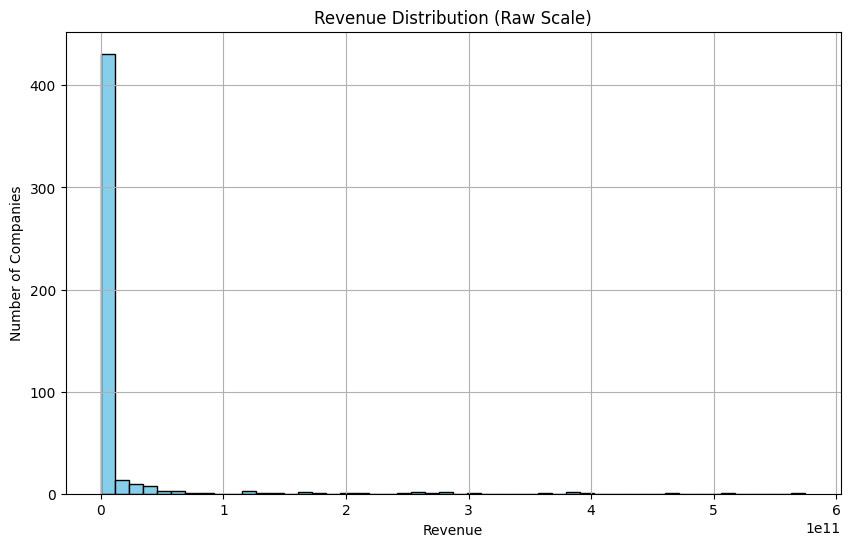

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your DataFrame is called df and has a 'revenue' column
plt.figure(figsize=(10, 6))
plt.hist(df_all_exp_cl['revenue'], bins=50, color='skyblue', edgecolor='black')
plt.title('Revenue Distribution (Raw Scale)')
plt.xlabel('Revenue')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

The main problem with the above histogram: Skew from Big Companies

Because some companies have very large revenues (like $574B), they dominate the scale, making smaller companies almost invisible. SO we better use log scale to present this data.

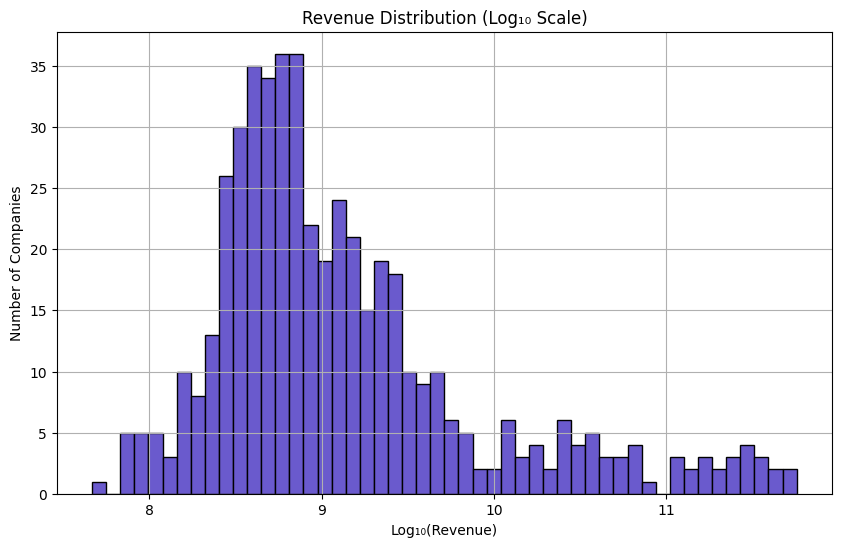

In [42]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.hist(np.log10(df_all_exp_cl['revenue']), bins=50, color='slateblue', edgecolor='black')
plt.title('Revenue Distribution (Log₁₀ Scale)')
plt.xlabel('Log₁₀(Revenue)')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()

In [39]:
# STEP 1: Define the mapping of tickers to labels
ticker_label_map = {
    # Enterprise SaaS
    "ADBE": "Enterprise SaaS", "MSFT": "Enterprise SaaS", "CRM": "Enterprise SaaS",
    "NOW": "Enterprise SaaS", "INTU": "Enterprise SaaS", "ADSK": "Enterprise SaaS",
    "WDAY": "Enterprise SaaS", "HUBS": "Enterprise SaaS", "PAYC": "Enterprise SaaS",
    "APPN": "Enterprise SaaS", "TTD": "Enterprise SaaS", "DOCU": "Enterprise SaaS",
    "TWLO": "Enterprise SaaS", "TEAM": "Enterprise SaaS", "ASAN": "Enterprise SaaS",
    "BOX": "Enterprise SaaS", "WK": "Enterprise SaaS",

    # Cloud & Data
    "DDOG": "Cloud & Data", "SNOW": "Cloud & Data", "MDB": "Cloud & Data", "ZS": "Cloud & Data",
    "CRWD": "Cloud & Data", "PANW": "Cloud & Data", "NET": "Cloud & Data", "OKTA": "Cloud & Data",
    "ESTC": "Cloud & Data", "DOCN": "Cloud & Data", "CFLT": "Cloud & Data", "DT": "Cloud & Data",
    "CYBR": "Cloud & Data", "TENB": "Cloud & Data", "FTNT": "Cloud & Data", "QLYS": "Cloud & Data",
    "NTNX": "Cloud & Data", "CHKP": "Cloud & Data", "RPD": "Cloud & Data", "FSLY": "Cloud & Data",
    "AKAM": "Cloud & Data", "IOT": "Cloud & Data", "VRNS": "Cloud & Data",

    # AI‑DevOps
    "MSTR": "AI‑DevOps", "PLTR": "AI‑DevOps", "AI": "AI‑DevOps", "FROG": "AI‑DevOps",
    "S": "AI‑DevOps", "PD": "AI‑DevOps", "GTLB": "AI‑DevOps", "PATH": "AI‑DevOps",
    "U": "AI‑DevOps", "PEGA": "AI‑DevOps", # "HCP": "AI‑DevOps",

    # Collab & CX SaaS
    "ZM": "Collab & CX SaaS", "RNG": "Collab & CX SaaS", "VRNT": "Collab & CX SaaS",
    "CXM": "Collab & CX SaaS", "FIVN": "Collab & CX SaaS", "EGHT": "Collab & CX SaaS",
    "NICE": "Collab & CX SaaS", "DBX": "Collab & CX SaaS", "APP": "Collab & CX SaaS",
    "YEXT": "Collab & CX SaaS", "SMAR": "Collab & CX SaaS",

    # Vertical SaaS
    "BL": "Vertical SaaS", "BILL": "Vertical SaaS", "BRZE": "Vertical SaaS",
    "RAMP": "Vertical SaaS", "AMPL": "Vertical SaaS", "PCOR": "Vertical SaaS",
    "MNDY": "Vertical SaaS", "DOCS": "Vertical SaaS", "APPF": "Vertical SaaS",
    "JAMF": "Vertical SaaS", "MANH": "Vertical SaaS", "GWRE": "Vertical SaaS",
    "TYL": "Vertical SaaS", "SPSC": "Vertical SaaS", "INTA": "Vertical SaaS",
    "CCCS": "Vertical SaaS", "DSGX": "Vertical SaaS",
    "ALTR": "Vertical SaaS", # "VEEV": "Vertical SaaS", "TOST": "Vertical SaaS",

    # Mature Pivots
    "SAP": "Mature Pivots", "ORCL": "Mature Pivots", "ACN": "Mature Pivots", "FICO": "Mature Pivots",
    # "IBM": "Mature Pivots", "CSCO": "Mature Pivots", "HPE": "Mature Pivots", "DELL": "Mature Pivots", 

    # Consumer SaaS
    "SHOP": "Consumer SaaS", "DUOL": "Consumer SaaS", "UBER": "Consumer SaaS",
    "GEN": "Consumer SaaS", "WIX": "Consumer SaaS", "ZETA": "Consumer SaaS",
    # "SPOT": "Consumer SaaS", "NFLX": "Consumer SaaS", "MTCH": "Consumer SaaS",

    # AI EDA
    # "CDNS": "AI EDA", "SNPS": "AI EDA", "ANSS": "AI EDA", "KEYS": "AI EDA",
    # "ALTR": "AI EDA",

    # Mega‑Cap Tech
    "AAPL": "Mega‑Cap Tech", "GOOG": "Mega‑Cap Tech", "META": "Mega‑Cap Tech",
    "AMZN": "Mega‑Cap Tech", "NVDA": "Mega‑Cap Tech"
}

In [40]:
# STEP 2: Add the label column using the ticker column
df_all_exp_cl["label"] = df_all_exp_cl["ticker"].map(ticker_label_map)

In [22]:
# Check if any tickers were missing from the mapping
missing_tickers = df_all_exp_cl[df_all_exp_cl["label"].isna()]["ticker"].unique()
if len(missing_tickers) > 0:
    print("The following tickers are missing from the label mapping:", missing_tickers)

In [23]:
# Ensure index is datetime type
df_all_exp_cl.index = pd.to_datetime(df_all_exp_cl.index)

In [24]:
# STEP 3: Save the updated DataFrame
df_all_exp_cl.to_csv("Step3_all_companies_features_with_labels_cleaned.csv")

In [25]:
df_all_exp_cat_cl = pd.read_csv("Step3_all_companies_features_with_labels_cleaned.csv", index_col="Date")

In [26]:
df_all_exp_cat_cl

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,roe,liabilities_to_equity,debt_to_equity,nopat,roic,sales_to_capital,fcf_to_netincome,revenuegrowth_t+1,ticker,label
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-27,11716000000,4141000000,2376000000,991000000,3804000000,0.206094,0.324684,0.353448,0.202800,0.084585,...,0.443267,0.422822,0.212802,3.005160e+09,0.284903,3.336667,0.758995,-0.068112,NVDA,Mega‑Cap Tech
2019-01-31,177722000,-53885000,58841000,140116000,-55084000,0.597458,-0.309945,-0.303198,0.331085,0.788400,...,-0.322680,0.848855,0.035523,-4.351636e+07,1.083548,7.567054,0.215997,0.524189,SMAR,Collab & CX SaaS
2019-01-31,249824000,-140077000,84551000,214899000,-136864000,1.103746,-0.547842,-0.560703,0.338442,0.860202,...,-1.876299,4.802869,0.000000,-1.081226e+08,7.862315,3.073561,0.468407,0.927009,CRWD,Cloud & Data
2019-01-31,267016000,-99011000,89854000,201359000,-97765000,0.728046,-0.366139,-0.370805,0.336512,0.754108,...,-0.374239,1.772374,0.819674,-7.723435e+07,-0.231523,16.427716,0.493248,0.579381,MDB,Cloud & Data
2019-01-31,2822180000,-418258000,1211832000,1238682000,-463284000,0.316899,-0.164158,-0.148204,0.429396,0.438910,...,-0.213567,1.818948,0.615172,-3.659944e+08,-0.144967,3.189048,-0.941287,0.285250,WDAY,Enterprise SaaS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,475422000,147582000,81983000,170956000,163878000,0.134518,0.344700,0.310423,0.172443,0.359588,...,0.163726,0.197446,0.016137,1.294636e+08,0.158045,9.717290,1.208108,0.199774,DOCS,Vertical SaaS
2024-04-30,310582000,-279696000,201365000,295537000,-318342000,0.164122,-1.024985,-0.900554,0.648347,0.951559,...,-0.320255,0.188780,0.003694,-2.514902e+08,-0.354495,1.563486,0.323094,0.252668,AI,AI‑DevOps
2024-04-30,1267321000,61720000,341951000,720276000,-129902000,0.185532,-0.102501,0.048701,0.269822,0.568345,...,0.083610,2.037946,0.804266,-1.026226e+08,-0.129658,57.487536,2.354375,0.170419,ESTC,Cloud & Data


In [27]:
print("Does the dataset have any missing values?")
has_missing = df_all_exp_cat_cl.isnull().values.any()
print(f"Result: {has_missing}")

print("\nSummary of missing values per column:")
missing_summary = df_all_exp_cat_cl.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

Does the dataset have any missing values?
Result: True

Summary of missing values per column:
sales_to_capital    18
revenuegrowth       14
dtype: int64


In [28]:
# Which rows contain NaNs?
df_all_exp_cat_cl[df_all_exp_cat_cl.isnull().any(axis=1)]

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,roe,liabilities_to_equity,debt_to_equity,nopat,roic,sales_to_capital,fcf_to_netincome,revenuegrowth_t+1,ticker,label
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,96666000,-178028000,68681000,161697000,-185465000,NaN,-1.918617,-1.841682,0.710498,1.672739,...,0.569750,-3.445980,-0.053318,-146517350.0,0.355325,NaN,0.831319,1.738791,SNOW,Cloud & Data
2019-01-31,76770000,-50928000,42585000,72366000,-52013000,NaN,-0.677517,-0.663384,0.554709,0.942634,...,0.281353,-1.628409,-0.000000,-41090270.0,0.200647,NaN,0.659500,0.857575,ASAN,Enterprise SaaS
2019-03-31,85695000,7833000,27499000,40386000,6921000,NaN,0.080763,0.091406,0.320894,0.471276,...,0.161512,0.784857,0.000000,5467590.0,0.367174,NaN,1.802119,0.358166,DOCS,Vertical SaaS
2019-04-30,91605000,-33346000,37318000,59943000,-36042000,NaN,-0.393450,-0.364019,0.407380,0.654364,...,0.201567,-2.616868,-0.000000,-28473180.0,0.107836,NaN,1.250135,0.710234,AI,AI‑DevOps
2019-06-30,143223000,-17139000,28826000,73607000,-5001000,NaN,-0.034918,-0.119667,0.201267,0.513933,...,-16.400957,349.465072,256.765550,-3950790.0,-0.015939,NaN,0.546065,0.304623,INTA,Vertical SaaS
2019-12-31,149805000,-95042000,58090000,140454000,-98108000,NaN,-0.654905,-0.634438,0.387771,0.937579,...,0.726815,-2.577792,-0.000000,-77505320.0,0.517672,NaN,0.755066,0.579233,CFLT,Cloud & Data
2019-12-31,68442000,-33534000,19036000,61632000,-34331000,NaN,-0.501607,-0.489962,0.278133,0.900500,...,0.533310,-2.800935,-0.000000,-27121490.0,0.190036,NaN,0.497525,0.497092,AMPL,Vertical SaaS
2019-12-31,70760000,-14782000,31560000,31360000,-12897000,1386.450980,-0.182264,-0.208903,0.446015,0.443188,...,0.176026,-2.131978,-0.121654,-10188630.0,0.076260,NaN,0.209309,1.285133,DUOL,Consumer SaaS
2019-12-31,78089000,-91611000,24637000,133992000,-92518000,NaN,-1.184776,-1.173161,0.315499,1.715888,...,0.701350,-2.417444,-0.100397,-73089220.0,0.252809,NaN,0.419349,1.063325,MNDY,Vertical SaaS


In [29]:
# In this place I will stop and write the code concerning indluding macro variables in other notebook

In [30]:
# uploading Step4_all_companies_features_with_labels_cleaned_macro
df_all_exp_cat_cl_macr = pd.read_csv("Step4_all_companies_features_with_labels_cleaned_macro.csv", index_col="Date")

In [31]:
df_all_exp_cat_cl_macr.head()

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,revenuegrowth_t+1,ticker,label,macro_year,GDPC1,CPIAUCSL,FEDFUNDS,UNRATE,GS10,UMCSENT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-27,11716000000,4141000000,2376000000,991000000,3804000000,0.206094,0.324684,0.353448,0.202800,0.084585,...,-0.068112,NVDA,Mega‑Cap Tech,2018,20304.874,251.0995,1.831667,3.891667,2.91,98.366667
2019-01-31,177722000,-53885000,58841000,140116000,-55084000,0.597458,-0.309945,-0.303198,0.331085,0.788400,...,0.524189,SMAR,Collab & CX SaaS,2018,20304.874,251.0995,1.831667,3.891667,2.91,98.366667
2019-01-31,249824000,-140077000,84551000,214899000,-136864000,1.103746,-0.547842,-0.560703,0.338442,0.860202,...,0.927009,CRWD,Cloud & Data,2018,20304.874,251.0995,1.831667,3.891667,2.91,98.366667
2019-01-31,267016000,-99011000,89854000,201359000,-97765000,0.728046,-0.366139,-0.370805,0.336512,0.754108,...,0.579381,MDB,Cloud & Data,2018,20304.874,251.0995,1.831667,3.891667,2.91,98.366667
2019-01-31,2822180000,-418258000,1211832000,1238682000,-463284000,0.316899,-0.164158,-0.148204,0.429396,0.438910,...,0.285250,WDAY,Enterprise SaaS,2018,20304.874,251.0995,1.831667,3.891667,2.91,98.366667


In [32]:
assert df_all_exp_cat_cl_macr["macro_year"].isnull().sum() == 0

In [33]:
# continue with this notebook

**Note about ratios connected with equity (example: debt-equity ratio):**

For firms with accumulated losses, recent write-down, or aggresive share buybacks book equity may be close to zero or negative (contributed capital is sxceeded), making D/E explode or flip sign. We can detect, and flag those situations, then ivestigate those years separetly: 

df.loc[df["Equity"] <= 0, "Debt_to_Equity"] = np.nan

Why it can distort interpretation?

- Direction flips: levarage ratios ar enormally positive and higher means more debt financing. A negative value no longer ollows that monotonic scale;
- Magnitude explodes: as equity approaches zero, the ratio goes toward +- inifnity, but the "jump" may refleect accounting quirk, rather than a real change infunding mix;
- Peercomparability breaks: we can not plot a firm at -3x next to pears at 1x and 2x and draw a clean levarage ranking.
- with negative equity we have more liabilities than assets, so in a sesne levarage is inifnite - regardless of whether the numeric ratio is  -2x or -10x.

My approach:

I will flag the situations when equity is negative by computing new column which will inidicate booleon value, butleave the values as are in other columns.

Proposed code:

df["negative_equity_flag"] = df["Equity"] < 0

eventually:

- When algo can handle NaN natively (XGBoost, LightGBM) or you can impute a constant

df.loc[df["Equity"] <= 0, "Debt_to_Equity"] = np.nan + boolean flagh

- When algo can not handle NaN natively we can impute a sentinel (e.g., –1) + boolean flag

In [34]:
df_all_exp_cat_cl_macr["negative_equity_flag"] = df_all_exp_cat_cl_macr["equity"] <= 0

In [35]:
# create flag
df_all_exp_cat_cl_macr["negative_equity_flag"].value_counts()

negative_equity_flag
False    424
True      70
Name: count, dtype: int64

In [36]:
# impute sentinel as mentioned above

df_all_exp_cat_cl_macr.loc[df_all_exp_cat_cl_macr["negative_equity_flag"], ["debt_to_equity", "liabilities_to_equity", "roe"]] = -1.0

In [37]:
df_all_exp_cat_cl_macr.head(20)

,revenue,netincome,r&d,sg&a,ebit,revenuegrowth,ebitmargin,netmargin,rd_to_revenue,sga_to_revenue,...,ticker,label,macro_year,GDPC1,CPIAUCSL,FEDFUNDS,UNRATE,GS10,UMCSENT,negative_equity_flag
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-27,11716000000,4141000000,2376000000,991000000,3804000000,0.206094,0.324684,0.353448,0.202800,0.084585,...,NVDA,Mega‑Cap Tech,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,177722000,-53885000,58841000,140116000,-55084000,0.597458,-0.309945,-0.303198,0.331085,0.788400,...,SMAR,Collab & CX SaaS,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,249824000,-140077000,84551000,214899000,-136864000,1.103746,-0.547842,-0.560703,0.338442,0.860202,...,CRWD,Cloud & Data,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,267016000,-99011000,89854000,201359000,-97765000,0.728046,-0.366139,-0.370805,0.336512,0.754108,...,MDB,Cloud & Data,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,2822180000,-418258000,1211832000,1238682000,-463284000,0.316899,-0.164158,-0.148204,0.429396,0.438910,...,WDAY,Enterprise SaaS,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,96666000,-178028000,68681000,161697000,-185465000,NaN,-1.918617,-1.841682,0.710498,1.672739,...,SNOW,Cloud & Data,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,True
2019-01-31,117823000,-40741000,38858000,104031000,-42321000,0.479631,-0.359191,-0.345781,0.329800,0.882943,...,PD,AI‑DevOps,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,275171000,31277000,47872000,66885000,41443000,0.158912,0.150608,0.113664,0.173972,0.243067,...,DSGX,Vertical SaaS,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False
2019-01-31,330517000,7584000,33014000,230335000,6167000,1.181947,0.018659,0.022946,0.099886,0.696893,...,ZM,Collab & CX SaaS,2018,20304.874,251.099500,1.831667,3.891667,2.910000,98.366667,False


In [38]:
df_all_exp_cat_cl_macr.to_csv("Step5_all_companies_features_with_labels_cleaned_macro_flag.csv")